# Then and Now: A Parakeet Story
## *Told with data from the Cornell Bird Lab's eBird API*

-------
### The Carolina Parakeet, *Conuropsis carolinensis*
![John James Audubon's 'Carolina Parakeets,' from the permanent collection at the New York Historical Society](resources/carolina.jpg)

The Carolina Parakeet was once common in the United States -- it ranged from the swamps of Florida to the Ohio River Valley.  As early as the 1700s, naturalists began noticing a decline in the parakeet's numbers.  Its population dropped precipitously in the 1800s, and by the early 1900s, it was functionally gone from the wilds.  The last wild Carolina Parakeet was spotted in 1915; the species was declared extinct in 1939.

With user-generated data from the Cornell Bird Lab, we can take a look at some of the last recorded sightings of the Carolina Parakeet in the US.

Thanks to programs like the R. Dale Twining project, nature journals, personal diaries, and birding lists of long-deceased ornithologists and even amateur birders have been preserved digitally.  While the eBird API is more commonly used to display recent birding observations, we searched the oldest dates in eBird for sightings of the Carolina Parakeet--elusive even in the 1800s!

This project not only provided a snapshot in time as one of America's most stunning birds was fading from existence; it also connected our team to the personal histories of birdwatchers from long ago.

In [26]:
import pandas as pd
from config import mapbox_token
import plotly.express as px
import plotly.graph_objs as go
import os
import numpy as np
from datetime import datetime


%reload_ext lab_black

px.set_mapbox_access_token(mapbox_token)

In [2]:
# read the data
CAROLINA_PARAKEETS = os.path.join("resources", "carolina_parakeets.csv")
FLORIDA_PARAKEETS = os.path.join("resources", "florida_parakeets.csv")
AUSTIN_PARAKEETS = os.path.join("resources", "austin_parakeets.csv")

In [3]:
carolina_df = pd.read_csv(CAROLINA_PARAKEETS)
carolina_df = carolina_df.rename(
    columns={
        "comName": "Common Name",
        "locName": "Location",
        "obsDt": "Date",
        "howMany": "Number Seen",
    }
)
carolina_df.head()

speciesCode        Common Name                  sciName     locId  \
0      carpar  Carolina Parakeet  Conuropsis carolinensis  L4943666   
1      carpar  Carolina Parakeet  Conuropsis carolinensis  L6089701   
2      carpar  Carolina Parakeet  Conuropsis carolinensis  L6094510   
3      carpar  Carolina Parakeet  Conuropsis carolinensis  L5972719   
4      carpar  Carolina Parakeet  Conuropsis carolinensis  L5972948   

                                            Location        Date  Number Seen  \
0                        10 miles north of Nashville  1810-04-25          1.0   
1      Alabama River, near old Rutherford Plantation  1826-01-06        300.0   
2  Below Wiggins Landing, over three miles below ...  1826-01-08          NaN   
3               Sandy Bridge inn (log cabin in 1831)  1831-12-15          NaN   
4   just outside 1831 Memphis-near Mississippi River  1831-12-22          4.0   

         lat        lng  obsValid  obsReviewed  locationPrivate      subId  
0  36.357716 -86.796327      True         True             True  S31718675  
1  32.277953 -87.157073      True         True             True  S38148557  
2  31.340047 -87.767029      True         True             True  S38175212  
3  36.033672 -88.275600      True         True             True  S37580809  
4  35.132966 -90.063257      True         True             True  S37581637

In [4]:
carolina_df["Number Seen"] = carolina_df["Number Seen"].fillna(1)
carolina_df.head()

speciesCode        Common Name                  sciName     locId  \
0      carpar  Carolina Parakeet  Conuropsis carolinensis  L4943666   
1      carpar  Carolina Parakeet  Conuropsis carolinensis  L6089701   
2      carpar  Carolina Parakeet  Conuropsis carolinensis  L6094510   
3      carpar  Carolina Parakeet  Conuropsis carolinensis  L5972719   
4      carpar  Carolina Parakeet  Conuropsis carolinensis  L5972948   

                                            Location        Date  Number Seen  \
0                        10 miles north of Nashville  1810-04-25          1.0   
1      Alabama River, near old Rutherford Plantation  1826-01-06        300.0   
2  Below Wiggins Landing, over three miles below ...  1826-01-08          1.0   
3               Sandy Bridge inn (log cabin in 1831)  1831-12-15          1.0   
4   just outside 1831 Memphis-near Mississippi River  1831-12-22          4.0   

         lat        lng  obsValid  obsReviewed  locationPrivate      subId  
0  36.357716 -86.796327      True         True             True  S31718675  
1  32.277953 -87.157073      True         True             True  S38148557  
2  31.340047 -87.767029      True         True             True  S38175212  
3  36.033672 -88.275600      True         True             True  S37580809  
4  35.132966 -90.063257      True         True             True  S37581637

In [40]:
carolina_df["Decade"] = pd.DatetimeIndex(carolina_df["Date"]).year // 10 * 10
carolina_df

speciesCode        Common Name                  sciName      locId  \
0       carpar  Carolina Parakeet  Conuropsis carolinensis   L4943666   
1       carpar  Carolina Parakeet  Conuropsis carolinensis   L6089701   
2       carpar  Carolina Parakeet  Conuropsis carolinensis   L6094510   
3       carpar  Carolina Parakeet  Conuropsis carolinensis   L5972719   
4       carpar  Carolina Parakeet  Conuropsis carolinensis   L5972948   
5       carpar  Carolina Parakeet  Conuropsis carolinensis   L5004099   
6       carpar  Carolina Parakeet  Conuropsis carolinensis   L2892988   
7       carpar  Carolina Parakeet  Conuropsis carolinensis    L678870   
8       carpar  Carolina Parakeet  Conuropsis carolinensis    L293200   
9       carpar  Carolina Parakeet  Conuropsis carolinensis   L1228913   
10      carpar  Carolina Parakeet  Conuropsis carolinensis    L598778   
11      carpar  Carolina Parakeet  Conuropsis carolinensis  L11236575   
12      carpar  Carolina Parakeet  Conuropsis carolinensis    L152160   
13      carpar  Carolina Parakeet  Conuropsis carolinensis   L3960424   
14      carpar  Carolina Parakeet  Conuropsis carolinensis  L10037437   
15      carpar  Carolina Parakeet  Conuropsis carolinensis    L122411   
16      carpar  Carolina Parakeet  Conuropsis carolinensis   L1223694   
17      carpar  Carolina Parakeet  Conuropsis carolinensis   L2884594   

                                             Location              Date  \
0                         10 miles north of Nashville        1810-04-25   
1       Alabama River, near old Rutherford Plantation        1826-01-06   
2   Below Wiggins Landing, over three miles below ...        1826-01-08   
3                Sandy Bridge inn (log cabin in 1831)        1831-12-15   
4    just outside 1831 Memphis-near Mississippi River        1831-12-22   
5   Old Road to Selma from Old Saffold Plantation ...  1838-12-20 10:30   
6                                            Mandarin        1870-01-01   
7       St. Sebastian River Preserve SP (Brevard Co.)        1885-02-01   
8                                        Thonotosassa        1887-03-25   
9             Ohio River at Little Scioto River mouth        1810-03-05   
10                                   Big Bone Lick SP        1810-03-16   
11         Mississippi River--St. Francis River Mouth        1819-01-07   
12                                         Louisville        1819-05-25   
13   Ohio River between Wabash mouth & Highland Creek        1820-11-05   
14                                     Fremont County        1843-05-08   
15                                        Little Rock        1854-12-16   
16                                     Bayou du Chien        1876-01-02   
17                                  Greenbrier County        1881-08-15   

    Number Seen        lat        lng  obsValid  obsReviewed  locationPrivate  \
0           1.0  36.357716 -86.796327      True         True             True   
1         300.0  32.277953 -87.157073      True         True             True   
2           1.0  31.340047 -87.767029      True         True             True   
3           1.0  36.033672 -88.275600      True         True             True   
4           4.0  35.132966 -90.063257      True         True             True   
5          90.0  32.253604 -86.991978      True         True             True   
6           1.0  30.155815 -81.624298      True         True             True   
7           1.0  27.824853 -80.606355      True         True            False   
8           4.0  28.061400 -82.302310      True         True             True   
9           1.0  38.752392 -82.888413      True         True             True   
10          1.0  38.885086 -84.750830      True         True            False   
11          1.0  34.624459 -90.592996      True         True             True   
12          1.0  38.254270 -85.759360      True         True             True   
13          1.0  37.780450 -87.975648      True        

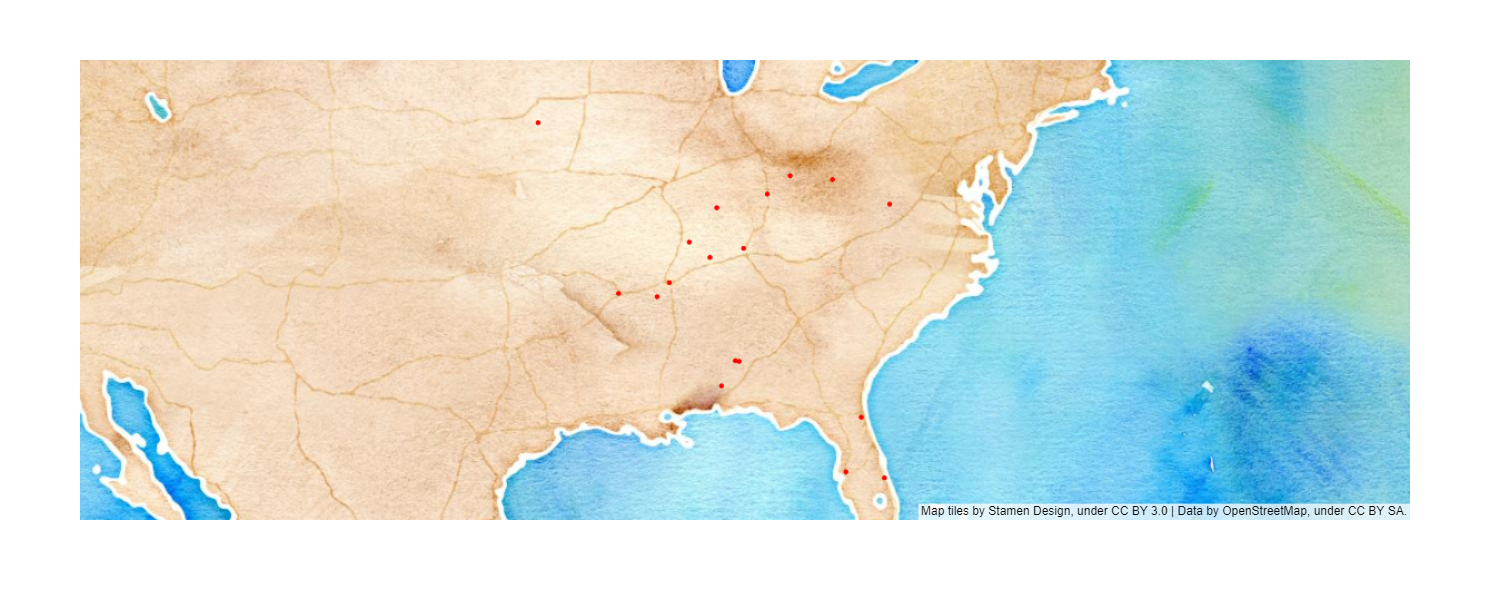

In [52]:
# create the plot
location_labels = []


fig = px.scatter_mapbox(
    carolina_df,
    lat="lat",
    lon="lng",
    hover_name="Location",
    hover_data={"Date": "|%B %d, %Y", "lat": False, "lng": False},
    color_discrete_sequence=["red"],
    mapbox_style="stamen-watercolor",
    width=1000,
    height=600,
    zoom=4,
)
fig.show()

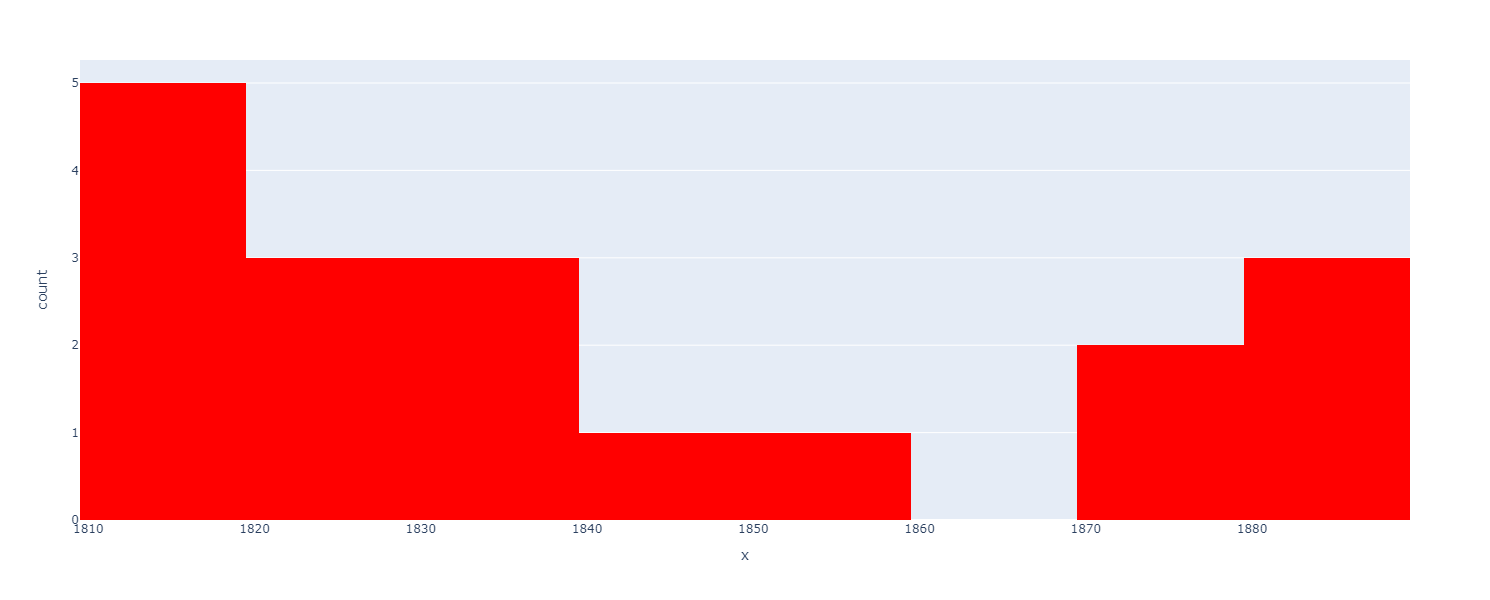

In [7]:
fig = px.histogram(
    x=carolina_df["Decade"],
    color_discrete_sequence=["red"],
    nbins=10,
    width=800,
    height=600,
)
fig.show()

In [8]:
florida_df = pd.read_csv(FLORIDA_PARAKEETS)
florida_df = florida_df.rename(
    columns={
        "comName": "Common Name",
        "locName": "Location",
        "obsDt": "Date",
        "howMany": "Number Seen",
    }
)
florida_df["Decade"] = pd.DatetimeIndex(florida_df["Date"]).year // 10 * 10
florida_df["Number Seen"] = florida_df["Number Seen"].fillna(1)
florida_df

speciesCode    Common Name              sciName     locId  \
0         monpar  Monk Parakeet  Myiopsitta monachus  L1288411   
1         monpar  Monk Parakeet  Myiopsitta monachus   L682100   
2         monpar  Monk Parakeet  Myiopsitta monachus  L1594644   
3         monpar  Monk Parakeet  Myiopsitta monachus  L1594644   
4         monpar  Monk Parakeet  Myiopsitta monachus   L498948   
...          ...            ...                  ...       ...   
4145      monpar  Monk Parakeet  Myiopsitta monachus  L4099117   
4146      monpar  Monk Parakeet  Myiopsitta monachus   L278775   
4147      monpar  Monk Parakeet  Myiopsitta monachus  L4105186   
4148      monpar  Monk Parakeet  Myiopsitta monachus  L2509202   
4149      monpar  Monk Parakeet  Myiopsitta monachus  L4110350   

                                               Location              Date  \
0                                            Dinner Key        1975-04-26   
1                      University of Miami--main campus        1975-04-27   
2                                        Hillsboro Club  1975-12-29 09:00   
3                                        Hillsboro Club  1976-01-02 09:00   
4                               Siesta Key Public Beach  1976-03-25 09:00   
...                                                 ...               ...   
4145                                         La Carreta  2015-12-27 14:27   
4146                                FL. Pinellas Bayway  2015-12-28 15:45   
4147                 Gulf Coast High School and Stadium  2015-12-29 17:15   
4148                                       Donegan Park  2015-12-30 15:01   
4149  US-FL-Boynton Beach-9824-9914 Boynton Beach Bl...  2015-12-31 17:00   

      Number Seen        lat        lng  obsValid  obsReviewed  \
0             1.0  25.727772 -80.235386      True        False   
1             1.0  25.719614 -80.276971      True        False   
2             1.0  26.261636 -80.080865      True        False   
3             1.0  26.261636 -80.080865      True        False   
4             1.0  27.264396 -82.551784      True        False   
...           ...        ...        ...       ...          ...   
4145          1.0  25.732553 -80.334683      True        False   
4146          8.0  27.710137 -82.715330      True        False   
4147          3.0  26.272415 -81.708812      True        False   
4148         14.0  27.902634 -82.770932      True        False   
4149          7.0  26.527617 -80.202437      True        False   

      locationPrivate      subId  Decade  
0               False  S52023895    1970  
1               False  S52024955    1970  
2                True  S11075480    1970  
3                True  S11075495    1970  
4               False  S42296382    1970  
...               ...        ...     ...  
4145             True  S26474112    2010  
4146             True  S26498382    2010  
4147             True  S26521075    2010  
4148            False  S26533332    2010  
4149             True  S26562650    2010  

[4150 rows x 14 columns]

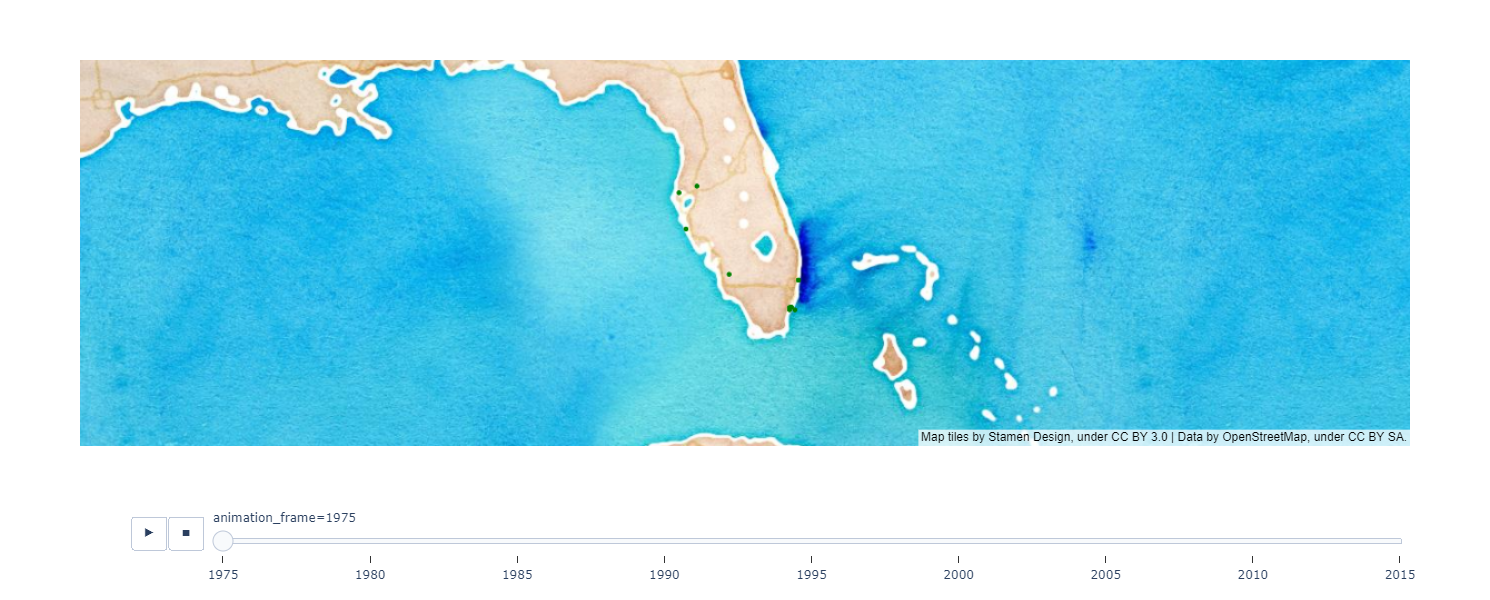

In [56]:
# create the plot
fig = px.scatter_mapbox(
    florida_df,
    lat="lat",
    lon="lng",
    animation_frame=pd.DatetimeIndex(florida_df["Date"]).year // 5 * 5,
    hover_name="Location",
    hover_data={"Date": "|%B %d, %Y", "Number Seen": True, "lat": False, "lng": False},
    color_discrete_sequence=["green"],
    mapbox_style="stamen-watercolor",
    width=1000,
    height=600,
    zoom=5,
)
fig.show()

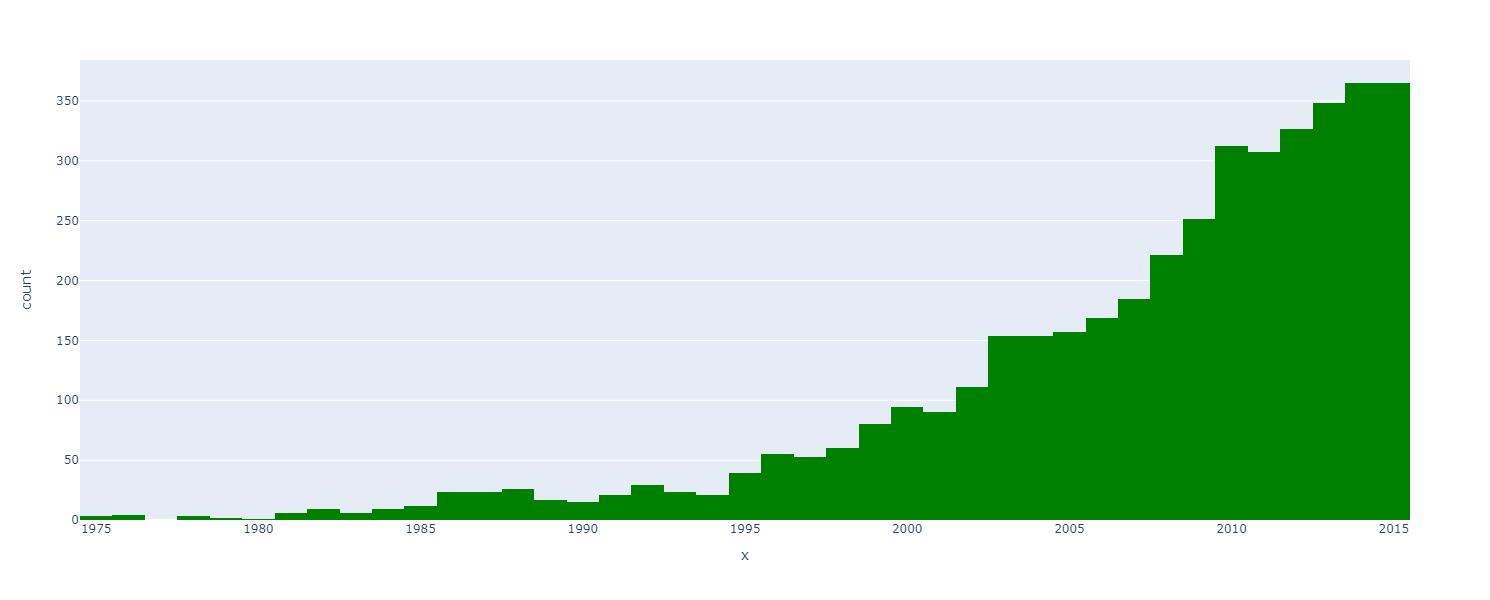

In [10]:
fig = px.histogram(
    x=pd.DatetimeIndex(florida_df["Date"]).year,
    color_discrete_sequence=["green"],
    width=1000,
    height=600,
)
fig.show()

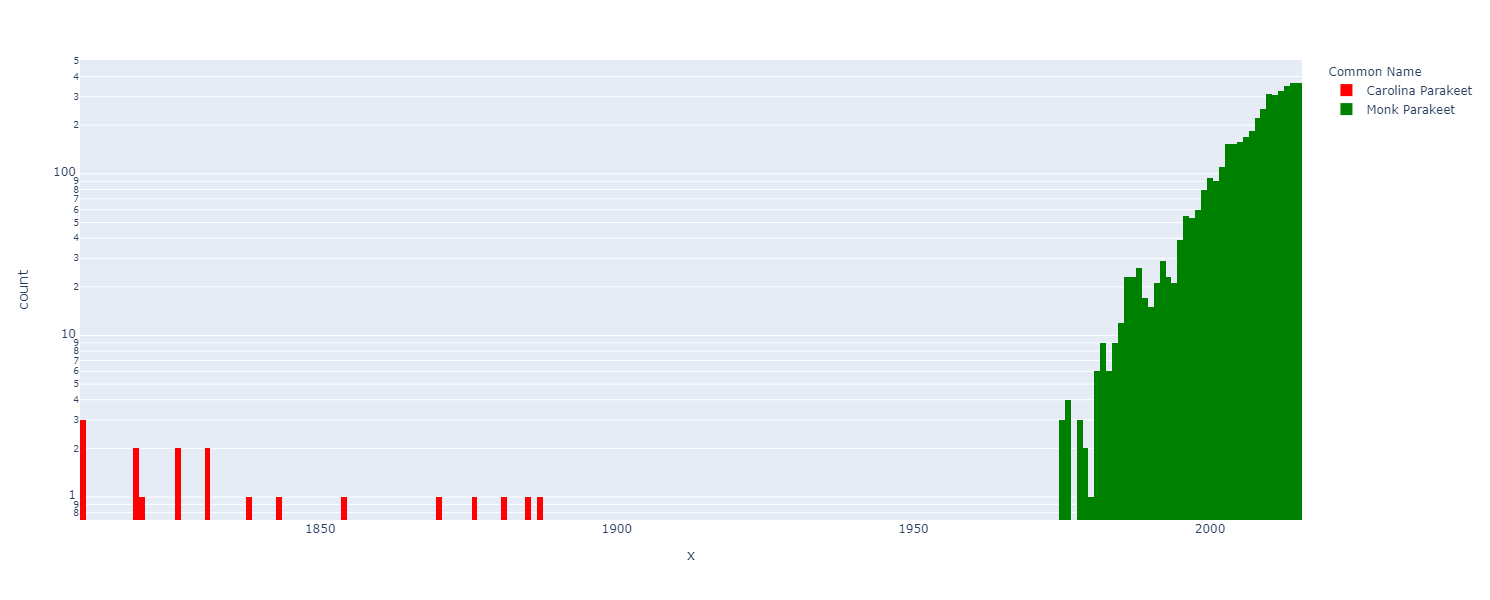

In [11]:
old_new_df = pd.merge(carolina_df, florida_df, how="outer")
fig = px.histogram(
    old_new_df,
    x=pd.DatetimeIndex(old_new_df["Date"]).year,
    log_y=True,
    color="Common Name",
    color_discrete_sequence=["red", "green"],
    width=1000,
    height=600,
)
fig.show()

In [12]:
austin_df = pd.read_csv(AUSTIN_PARAKEETS)
austin_df = austin_df.rename(
    columns={
        "comName": "Common Name",
        "locName": "Location",
        "obsDt": "Date",
        "howMany": "Number Seen",
    }
)
austin_df["Decade"] = pd.DatetimeIndex(austin_df["Date"]).year // 10 * 10
austin_df["Number Seen"] = austin_df["Number Seen"].fillna(1)
austin_df

speciesCode    Common Name              sciName      locId  \
0         monpar  Monk Parakeet  Myiopsitta monachus   L1449894   
1         monpar  Monk Parakeet  Myiopsitta monachus    L129110   
2         monpar  Monk Parakeet  Myiopsitta monachus    L129127   
3         monpar  Monk Parakeet  Myiopsitta monachus    L126472   
4         monpar  Monk Parakeet  Myiopsitta monachus    L130766   
...          ...            ...                  ...        ...   
3085      monpar  Monk Parakeet  Myiopsitta monachus   L5990370   
3086      monpar  Monk Parakeet  Myiopsitta monachus   L4828182   
3087      monpar  Monk Parakeet  Myiopsitta monachus    L130766   
3088      monpar  Monk Parakeet  Myiopsitta monachus    L129014   
3089      monpar  Monk Parakeet  Myiopsitta monachus  L10385066   

                                               Location              Date  \
0                       Auditorium Shores / Disch Field  1981-04-19 16:00   
1                     Town Lake Park (HOTE 042), Austin  1981-05-24 18:00   
2                                Zilker Park (HOTE 043)  1982-05-24 12:00   
3                                                Austin        1984-03-11   
4                               Hornsby Bend (HOTE 037)        1984-04-14   
...                                                 ...               ...   
3085                     Town Lake--Shoal Beach, Austin  2019-12-27 15:59   
3086                                          New Place  2019-12-28 15:07   
3087                            Hornsby Bend (HOTE 037)  2019-12-29 16:28   
3088                             Lakeshore Park, Austin  2019-12-30 15:30   
3089  Ann and Roy Butler Trail, Austin US-TX (30.250...  2019-12-31 13:57   

      Number Seen        lat        lng  obsValid  obsReviewed  \
0             2.0  30.263138 -97.752209      True        False   
1             4.0  30.264900 -97.759102      True        False   
2             2.0  30.267000 -97.769997      True        False   
3            11.0  30.267111 -97.743080      True        False   
4             1.0  30.218199 -97.645805      True        False   
...           ...        ...        ...       ...          ...   
3085          6.0  30.265294 -97.752142      True        False   
3086          4.0  30.328169 -97.718319      True        False   
3087          1.0  30.218199 -97.645805      True        False   
3088         12.0  30.247000 -97.715200      True        False   
3089         20.0  30.250223 -97.733642      True        False   

      locationPrivate      subId  Decade  
0               False  S19107353    1980  
1               False  S19197134    1980  
2               False  S22063334    1980  
3                True   S7430093    1980  
4               False   S7430356    1980  
...               ...        ...     ...  
3085            False  S62678681    2010  
3086             True  S62711477    2010  
3087            False  S62755213    2010  
3088            False  S62817832    2010  
3089             True  S62820646    2010  

[3090 rows x 14 columns]

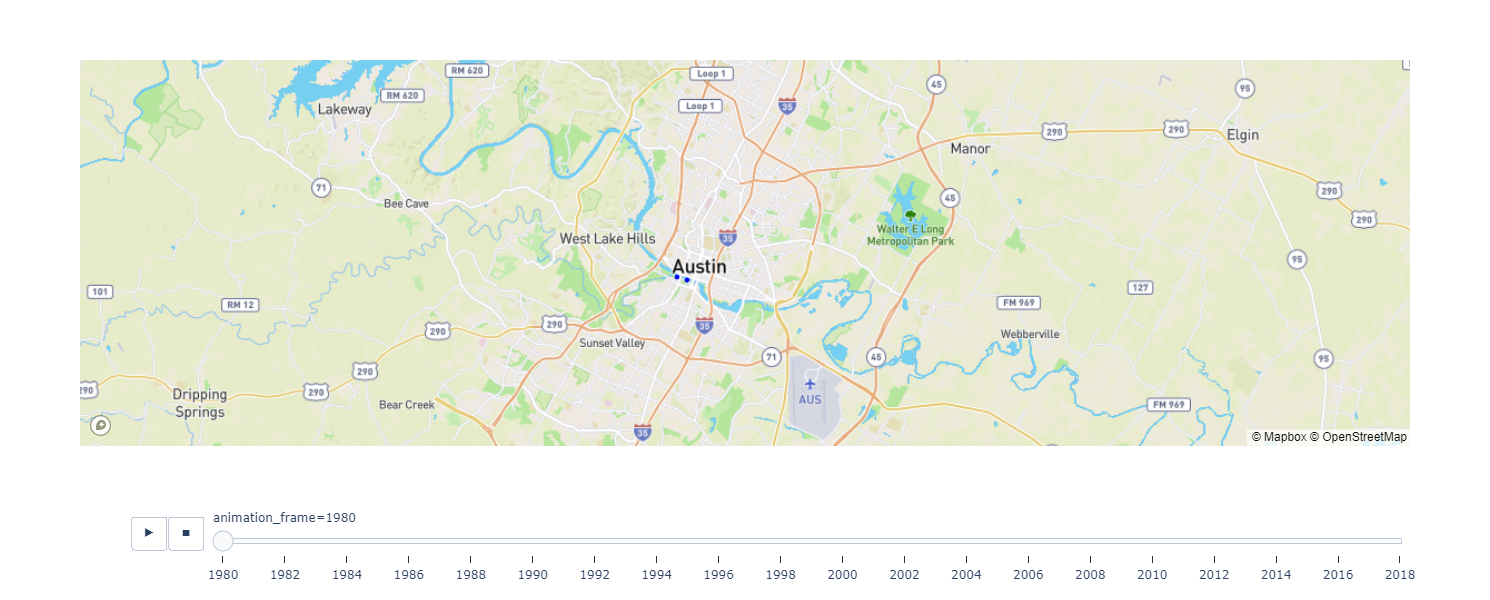

In [58]:
# create the plot
fig = px.scatter_mapbox(
    austin_df,
    lat="lat",
    lon="lng",
    animation_frame=pd.DatetimeIndex(austin_df["Date"]).year // 2 * 2,
    hover_name="Location",
    hover_data={"Date": "|%B %d, %Y", "lat": False, "lng": False, "Number Seen": True},
    color_discrete_sequence=["blue"],
    mapbox_style="outdoors",
    width=1000,
    height=600,
    zoom=10,
)
fig.show()

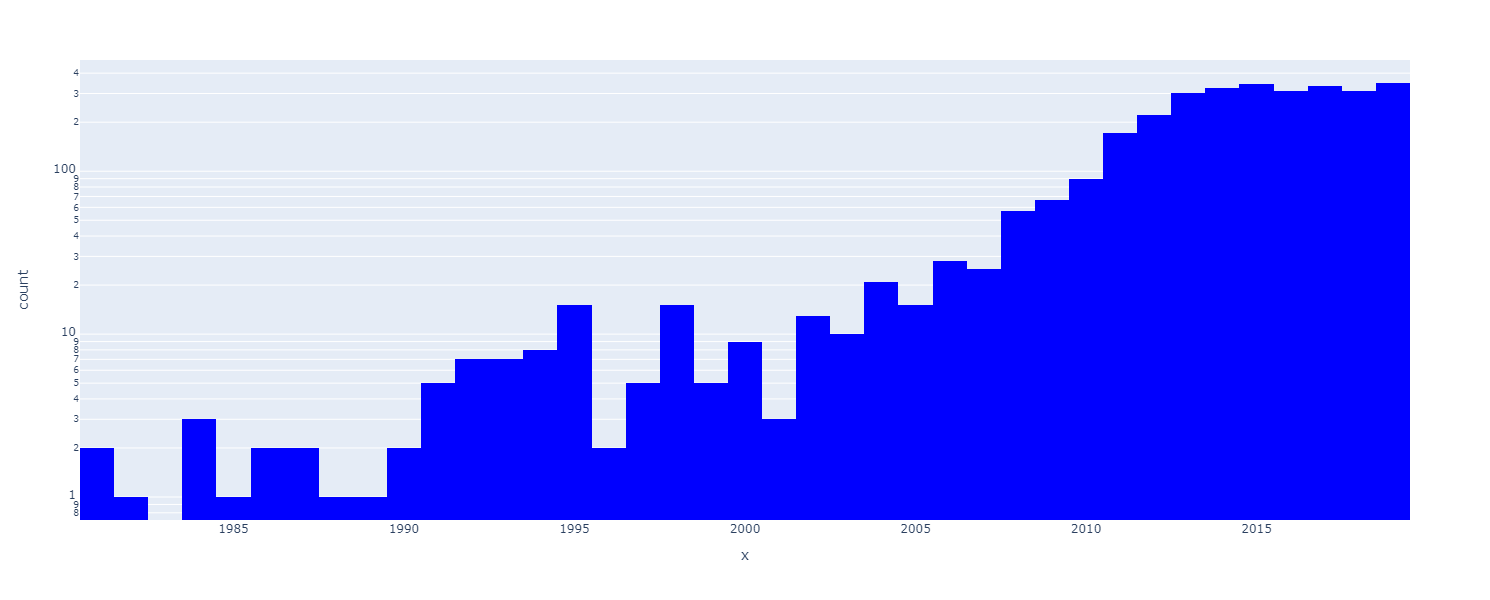

In [14]:
fig = px.histogram(
    x=pd.DatetimeIndex(austin_df["Date"]).year,
    color_discrete_sequence=["blue"],
    width=1000,
    height=600,
    log_y=True,
)
fig.show()

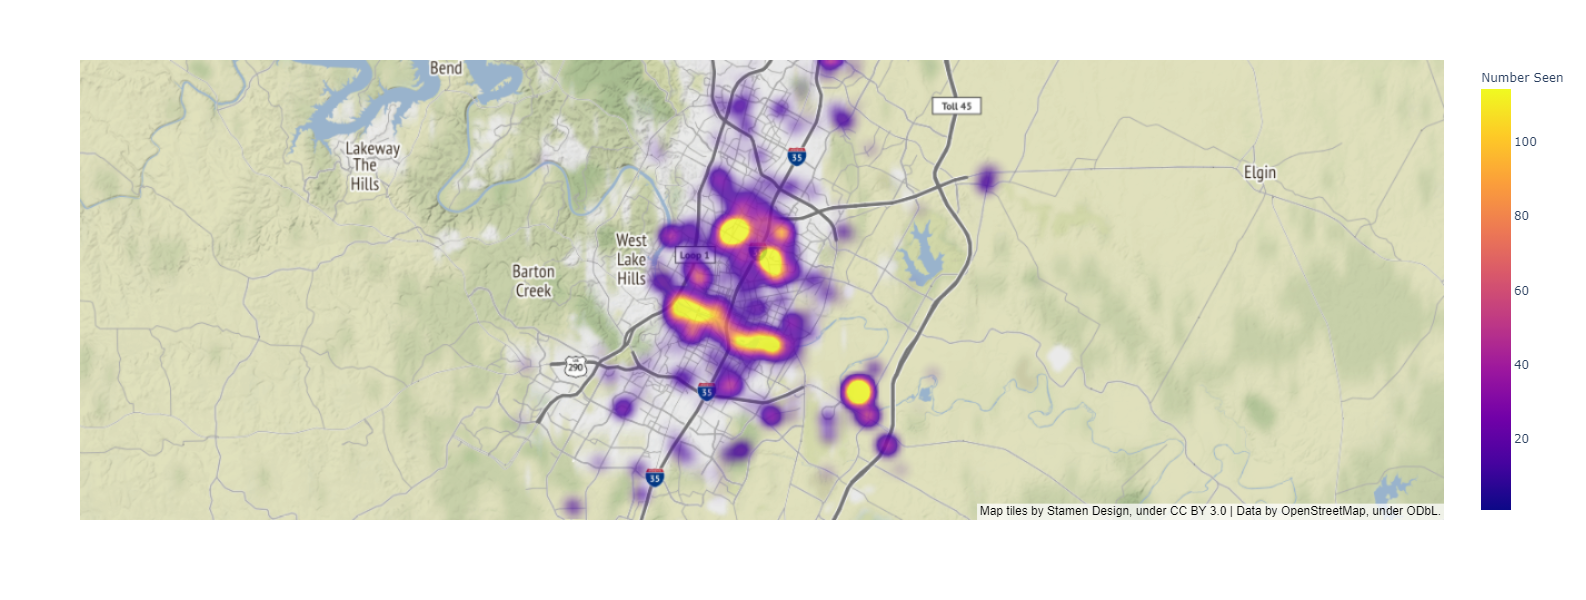

In [69]:
fig = px.density_mapbox(
    austin_df,
    lat="lat",
    lon="lng",
    mapbox_style="stamen-terrain",
    z="Number Seen",
    radius=20,
    opacity=0.8,
    hover_data={"lat": False, "lng": False, "Location": True, "Number Seen": True},
    zoom=10,
    width=1000,
    height=600,
)
fig.show()